In [1]:
import numpy as np
import helper_utils

In [2]:
helper_utils.list_available_tracks()

['reInvent2019_track', '2022_august_open', 'Canada_Training', 'canada_race', 'Tokyo_Training_track', 'Oval_track', 'thunder_hill_pro_cw', 'New_York_Track', 'Bowtie_track', 'H_track', 'reinvent_base', '2022_september_open', 'Mexico_track', 'Virtual_May19_Train_track', 'Straight_track', 'AWS_track', 'China_track', '2022_july_open', '2022_june_open', 'London_Loop_Train']


In [3]:
TRACK_NAME = 'thunder_hill_pro_cw'
center_line, inner_border, outer_border = helper_utils.load_track_waypoints(TRACK_NAME)

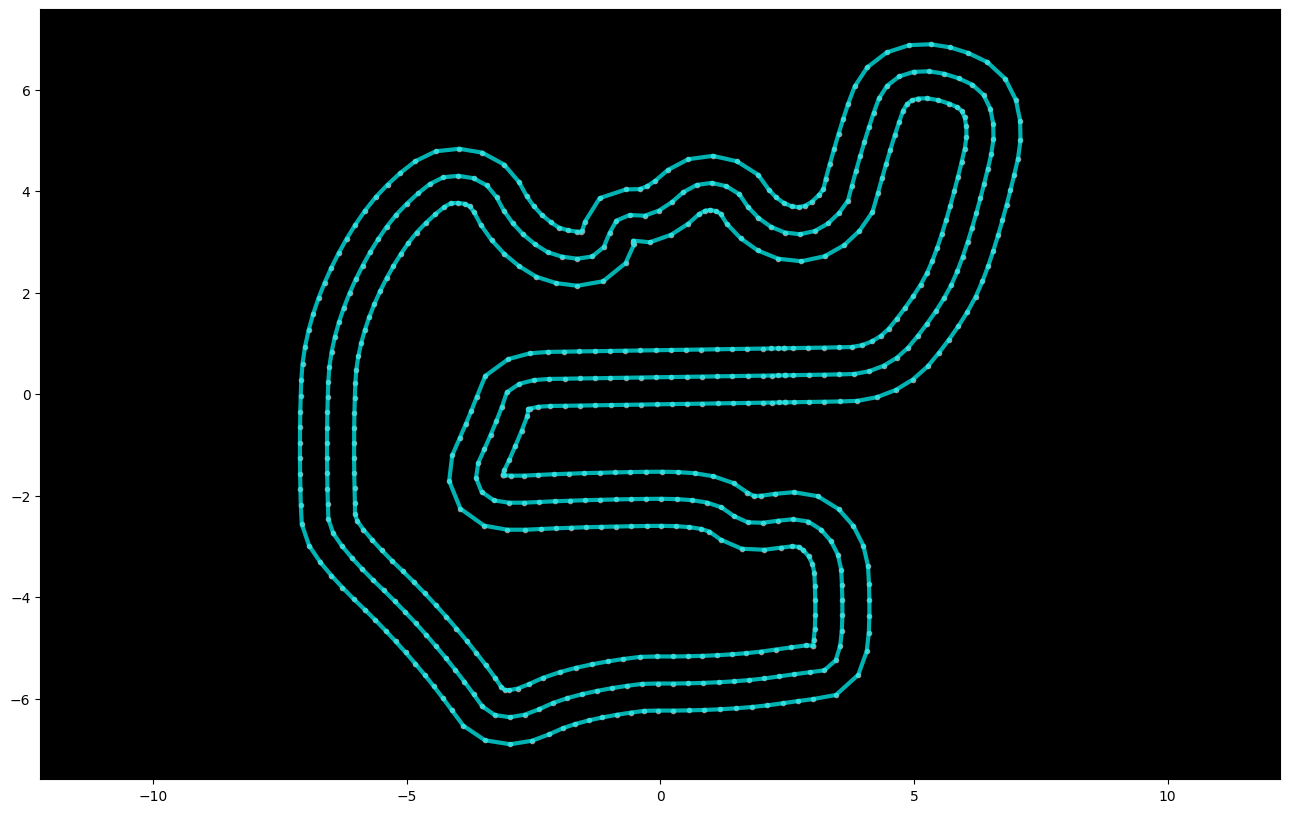

In [4]:
helper_utils.plot_track(center_line, inner_border, outer_border)

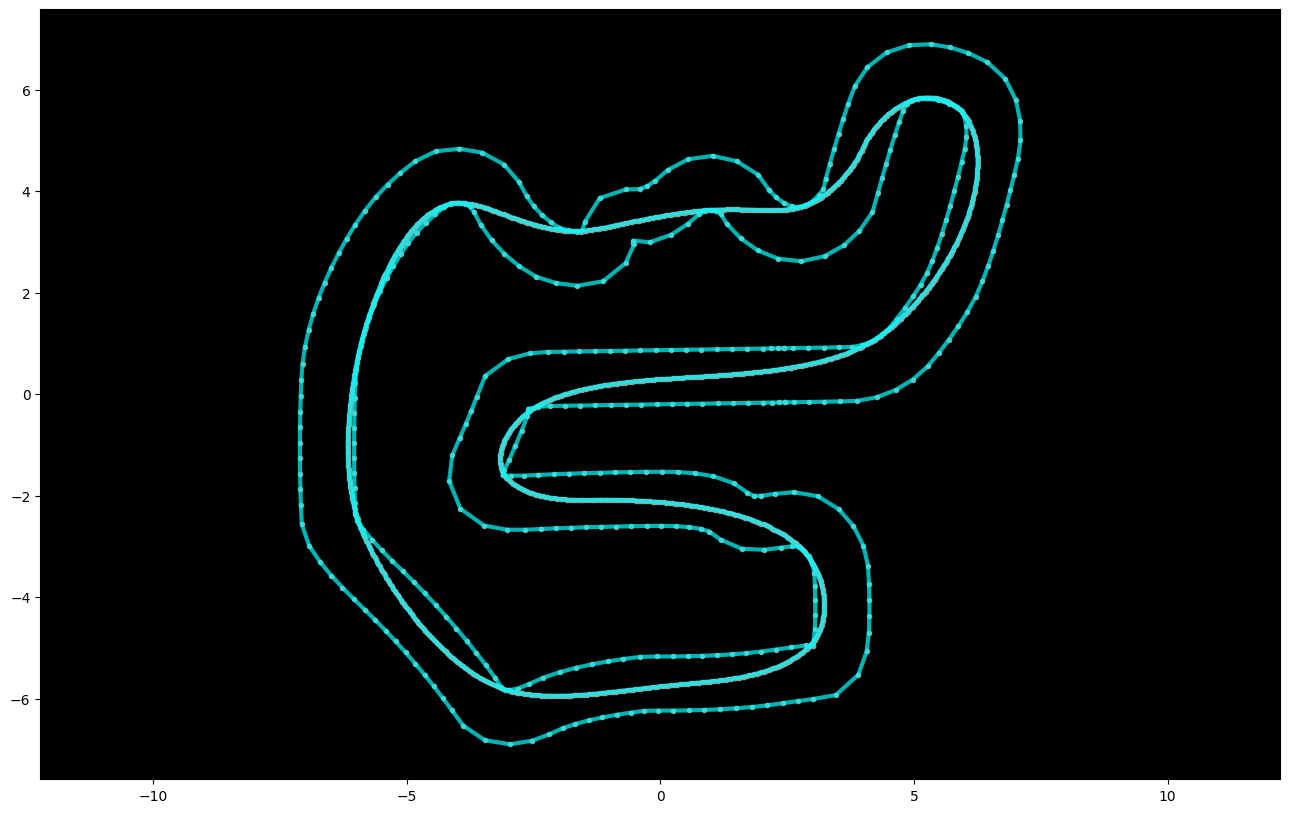

In [5]:
racing_line = helper_utils.load_py_to_ndarray('./racelines-populated/thunder_hill_pro_cw-cubspl-5.47-2023-06-19-172719.py')
helper_utils.plot_track(racing_line, inner_border, outer_border)

In [6]:
npoints = len(racing_line) - 1

In [7]:
track_curvatures = helper_utils.load_py_to_ndarray('./track-curvatures/thunder_hill_pro_cw-2023-06-19-173038.py')
turning_radii = np.abs(track_curvatures)
turning_radii

array([9.15711, 9.05657, 9.15808, ..., 7.88671, 8.35217, 8.60895])

In [9]:
MAX_SPEED = 1.0
MIN_SPEED = 0.5
LOOKAHEAD = 25

c = MIN_SPEED / np.sqrt(np.amin(turning_radii))
# c = 1.5

optimal_speeds = c * np.sqrt(turning_radii)
final_optimal_speeds = np.zeros(npoints)
for i in range(npoints):
    next_close = (i + 1) % npoints
    next_far = (i + 1 + LOOKAHEAD) % npoints
    if next_far > next_close:
        final_optimal_speeds[i] = np.amin(optimal_speeds[next_close:next_far])
    else:
        final_optimal_speeds[i] = np.amin(np.concatenate((optimal_speeds[next_close:], optimal_speeds[:next_far])))
final_optimal_speeds = np.maximum(np.minimum(final_optimal_speeds, MAX_SPEED), MIN_SPEED)

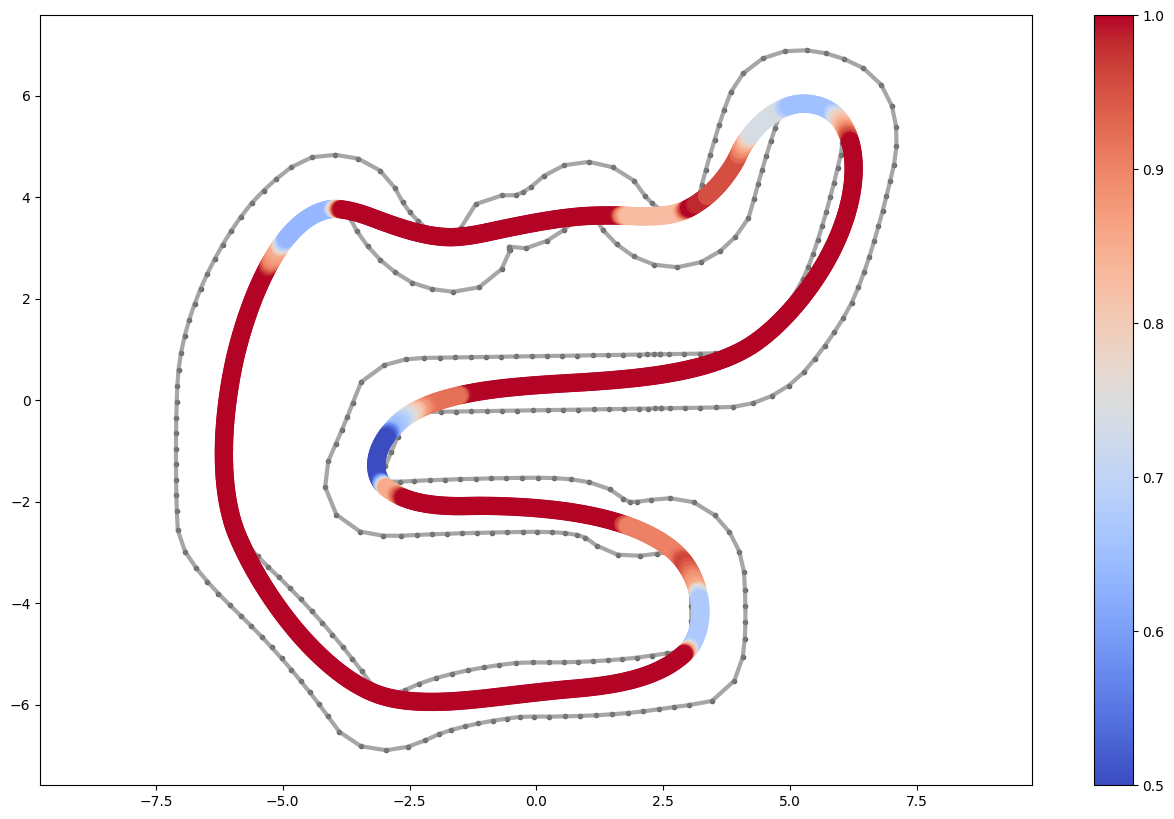

In [10]:
fig = helper_utils.plot_border(inner_border, outer_border)
scatter = fig.gca().scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=final_optimal_speeds, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [11]:
from datetime import datetime

now = datetime.now()
prefix = './speeds/%s-%d-%d-%s' % (TRACK_NAME, c, LOOKAHEAD, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array1D_repr_columns(final_optimal_speeds, 14)
helper_utils.export_ndarray(final_optimal_speeds, prefix, arr_repr)

Writing python code to ./speeds/thunder_hill_pro_cw-0-25-2023-06-19-173136.py
Writing numpy binary to ./speeds/thunder_hill_pro_cw-0-25-2023-06-19-173136.npy


In [12]:
from datetime import datetime

now = datetime.now()
prefix = './inner-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array2D_repr_columns(inner_border, 5)
helper_utils.export_ndarray(inner_border, prefix, arr_repr)

Writing python code to ./inner-borders/thunder_hill_pro_cw-2023-06-19-173136.py
Writing numpy binary to ./inner-borders/thunder_hill_pro_cw-2023-06-19-173136.npy


In [13]:
from datetime import datetime

now = datetime.now()
prefix = './outer-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array2D_repr_columns(outer_border, 5)
helper_utils.export_ndarray(outer_border, prefix, arr_repr)

Writing python code to ./outer-borders/thunder_hill_pro_cw-2023-06-19-173137.py
Writing numpy binary to ./outer-borders/thunder_hill_pro_cw-2023-06-19-173137.npy
